# **Bart** or **Homer** Classification (Dataset from a Cartoon Characters)

### Importing the libraries

In [1]:
import cv2
import numpy as np
import os
import zipfile
from google.colab.patches import cv2_imshow
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.14.0'

### Extracting pixels from images

In [2]:
## loading the drive where the cartoon zip folder is stored
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# unzipping the cartoon folder
path = '/content/drive/MyDrive/cartoon.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [4]:
## adding all the images in the cartoon folder in a list using os.path and os.listdir function
directory = '/content/cartoon'
files = [os.path.join(directory, f) for f in sorted(os.listdir(directory))]
print(files)

['/content/cartoon/.DS_Store', '/content/cartoon/bart1.bmp', '/content/cartoon/bart10.bmp', '/content/cartoon/bart100.bmp', '/content/cartoon/bart101.bmp', '/content/cartoon/bart102.bmp', '/content/cartoon/bart103.bmp', '/content/cartoon/bart104.bmp', '/content/cartoon/bart105.bmp', '/content/cartoon/bart106.bmp', '/content/cartoon/bart108.bmp', '/content/cartoon/bart109.bmp', '/content/cartoon/bart11.bmp', '/content/cartoon/bart110.bmp', '/content/cartoon/bart111.bmp', '/content/cartoon/bart112.bmp', '/content/cartoon/bart113.bmp', '/content/cartoon/bart114.bmp', '/content/cartoon/bart115.bmp', '/content/cartoon/bart116.bmp', '/content/cartoon/bart117.bmp', '/content/cartoon/bart118.bmp', '/content/cartoon/bart119.bmp', '/content/cartoon/bart12.bmp', '/content/cartoon/bart120.bmp', '/content/cartoon/bart121.bmp', '/content/cartoon/bart122.bmp', '/content/cartoon/bart123.bmp', '/content/cartoon/bart124.bmp', '/content/cartoon/bart125.bmp', '/content/cartoon/bart126.bmp', '/content/cart

In [7]:
## lets try to convert all the images in this format size for fast training
height, width = 128, 128

In [6]:
## for classification we need images and their labels
images = []
classes = []

In [9]:
## try and except because folder also has a "cartoon/.DS_Store" which can't be extracted
for image_path in files:
  try:
    image = cv2.imread(image_path)
    (H, W) = image.shape[:2]
    # print(image_path)
  except:
    continue

# image = cv2.reshape[image, (width, height)]

To understand why using [:2] because don't want to consider the color channels

In [10]:
image.shape

(742, 509, 3)

In [11]:
image.shape[:2]

(742, 509)

In [14]:
## resizing the image as above width, height = 128, 128 is already mentioned
image = cv2.resize(image, (width, height))

In [15]:
## lets confirm whether the images turned to 128,128 from 742, 509
image.shape[:2]

(128, 128)

In [16]:
## input layer if all three channels are used = 128 * 128 * 3 = 49152 parameters
## input layer if only gray scale is used = 128 * 128 = 16384 parameters is used --> better choice to use gray scale

In [17]:
## so sonverting to gray scale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

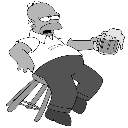

(128, 128)


In [18]:
## displaying the gray scale images:
cv2_imshow(image)
print(image.shape)

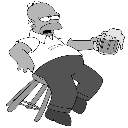

(16384,)


In [19]:
## creat input vector as 128x128=16384 format
cv2_imshow(image)
image = image.ravel()
print(image.shape)


In [36]:
## appending the above in image = []
images = []
images.append(image)

# Convert the list of NumPy arrays to a NumPy array orelse you might face 'numpy.ndarray' object has no attribute 'append'
images_array = np.array(images)
print(images_array)

[[255 255 255 ... 255 255 255]]


In [47]:
## creating binary classes as 0 and 1 and images as np.array (0,255....)

import cv2
import numpy as np

# Assuming you have defined width and height somewhere in your code
width = 128
height = 128

# Initialize an empty list to store NumPy arrays
images = []
classes = []

for image_path in files:
    try:
        image = cv2.imread(image_path)
        (H, W) = image.shape[:2]
    except Exception as e:
        print(f"Error reading image {image_path}: {e}")
        continue

    image = cv2.resize(image, (width, height))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = image.ravel()
    images.append(image)

  ## adding classes as 0 or 1 depending on whether cartoon character name start with b or not
    image_name = os.path.basename(os.path.normpath(image_path))
    if image_name.startswith('b'):
      class_name = 0
    else:
      class_name = 1

    classes.append(class_name)

# Convert the list of NumPy arrays to a NumPy array orelse you might face 'numpy.ndarray' object has no attribute 'append'
images_array = np.array(images)
classes_array = np.array(classes)
# print(images_array)
#print(classes_array)


Error reading image /content/cartoon/.DS_Store: 'NoneType' object has no attribute 'shape'


In [48]:
images

[array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([254, 254, 254, ..., 254, 254, 254], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 128, 123, 124], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([254, 254, 254, ..., 254, 254, 254], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 2

In [49]:
print(classes)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [50]:
type(images), type(classes)

(list, list)

In [51]:
X = np.asarray(images)
y = np.asarray(classes)

In [52]:
### type list to numpy array is required as tensorflow required this format
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [55]:
# 128 * 128 = 16384
X.shape

(269, 16384)

In [54]:
## total images we have 269 which are now divided as 0 and 1
y.shape

(269,)

In [56]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [57]:
X[0]

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [58]:
## X[0] is 1-D array, who convert it into metric format use shape method
X[0].reshape(width, height).shape

(128, 128)

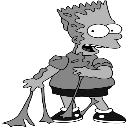

In [59]:
## on converting to metrics method you can vizualise the 0th index character
cv2_imshow(X[0].reshape(width, height))

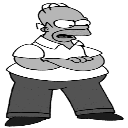

In [60]:
## any random character
cv2_imshow(X[200].reshape(width, height))

In [62]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [64]:
## to count the 0 and 1 classes
np.unique(y, return_counts=True)

(array([0, 1]), array([160, 109]))

### Normalizing the data using **MinMaxScaler**

Normalizing while help to faster the computation

In [65]:
X[0].max(), X[0].min()

(255, 0)

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [67]:
X[0].max(), X[0].min()

(1.0000000000000002, 0.0)

In [68]:
X[1]

array([0.9947644 , 0.99479167, 0.99479167, ..., 0.99559471, 0.99595142,
       0.9950495 ])

### Train and test set

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [71]:
## 80% train data
X_train.shape, y_train.shape

((215, 16384), (215,))

In [72]:
## 20% test data
X_test.shape, y_test.shape

((54, 16384), (54,))

# **Building** and **training** the neural network

In [73]:
## two hidden layers each having half the input parameters
(16384 + 2) / 2

8193.0

In [74]:
# 16384 -> 8193 -> 8193 -> 1
models = tf.keras.models.Sequential()
models.add(tf.keras.layers.Dense(input_shape=(16384,), units=8193, activation='relu'))
models.add(tf.keras.layers.Dense(units=8193, activation = 'relu'))
models.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [75]:
models.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8193)              134242305 
                                                                 
 dense_1 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_2 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201383941 (768.22 MB)
Trainable params: 201383941 (768.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
# https://keras.io/api/optimizers/
# https://keras.io/api/losses/
models.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [77]:
history = models.fit(X_train, y_train, epochs=50)

Epoch 1/50
7/7 [==============================] - 6s 57ms/step - loss: 113.9709 - accuracy: 0.5302
Epoch 2/50
7/7 [==============================] - 0s 55ms/step - loss: 17.2855 - accuracy: 0.5023
Epoch 3/50
7/7 [==============================] - 0s 55ms/step - loss: 12.3734 - accuracy: 0.5209
Epoch 4/50
7/7 [==============================] - 0s 54ms/step - loss: 11.2633 - accuracy: 0.5023
Epoch 5/50
7/7 [==============================] - 0s 54ms/step - loss: 8.2555 - accuracy: 0.5256
Epoch 6/50
7/7 [==============================] - 0s 55ms/step - loss: 4.7040 - accuracy: 0.6140
Epoch 7/50
7/7 [==============================] - 0s 55ms/step - loss: 1.5440 - accuracy: 0.4837
Epoch 8/50
7/7 [==============================] - 0s 56ms/step - loss: 0.7072 - accuracy: 0.5209
Epoch 9/50
7/7 [==============================] - 0s 55ms/step - loss: 0.6540 - accuracy: 0.6140
Epoch 10/50
7/7 [==============================] - 0s 55ms/step - loss: 0.6598 - accuracy: 0.6140
Epoch 11/50
7/7 [=======

### Evaluating the neural network

In [78]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

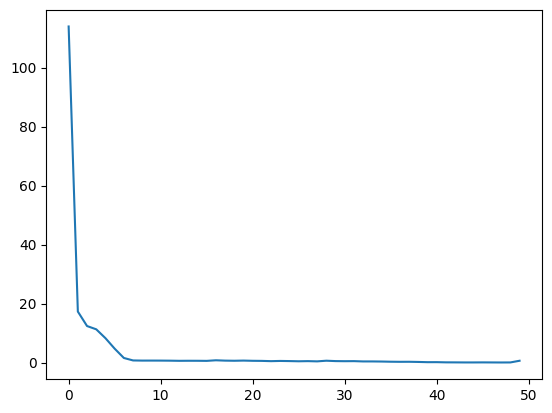

In [79]:
plt.plot(history.history['loss']);

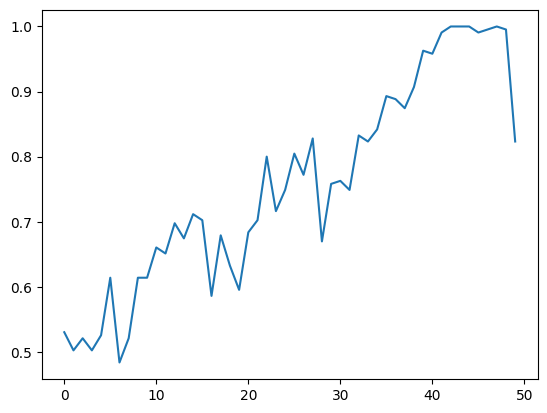

In [80]:
plt.plot(history.history['accuracy']);

In [81]:
X_test.shape

(54, 16384)

In [82]:
predictions = models.predict(X_test)
predictions

2/2 [==============================] - 0s 7ms/step


array([[2.40831537e-06],
       [1.71979060e-04],
       [1.01089718e-05],
       [4.84025259e-06],
       [4.10914872e-05],
       [1.53694305e-06],
       [9.44334315e-04],
       [4.38743118e-05],
       [3.77274337e-05],
       [2.82247056e-05],
       [3.81368932e-06],
       [9.30890813e-03],
       [7.57587550e-05],
       [1.59611063e-05],
       [7.90609556e-06],
       [3.11405529e-06],
       [7.01619911e-06],
       [1.95909615e-05],
       [1.39014282e-05],
       [3.45797389e-06],
       [1.11604850e-05],
       [2.15475302e-05],
       [2.49803088e-06],
       [7.28699251e-06],
       [8.71654356e-06],
       [2.75332732e-05],
       [5.94159837e-06],
       [2.56106814e-05],
       [8.62146226e-06],
       [1.68838276e-04],
       [5.54017242e-06],
       [1.13293319e-03],
       [3.48614376e-05],
       [2.15145496e-06],
       [3.20689450e-03],
       [1.11851625e-06],
       [8.62773777e-06],
       [9.17363468e-06],
       [6.66750157e-06],
       [1.61343280e-06],


In [ ]:
# 0 False - Bart
# 1 True  - Homer

In [83]:
predictions = (predictions > 0.5)
predictions

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [84]:
y_test

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.5185185185185185

**Training Accuracy** --> 99-100% <br>
**Test Accuracy** --> 51.85%

In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[28,  0],
       [26,  0]])

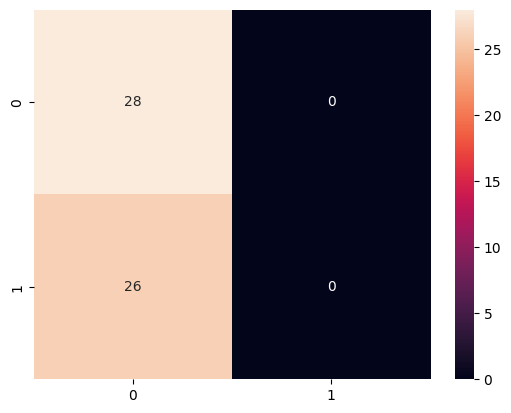

In [87]:
sns.heatmap(cm, annot=True);

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.52      1.00      0.68        28
           1       0.00      0.00      0.00        26

    accuracy                           0.52        54
   macro avg       0.26      0.50      0.34        54
weighted avg       0.27      0.52      0.35        54



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Saving**

In [89]:
## for saving the network use to_json
model_json = models.to_json()
with open('cartoon_model.json', 'w') as json_file:
  json_file.write(model_json)

In [90]:
## for saving the model weights use save_model --> hdf5 is used for tensorflow
from keras.models import save_model
model_saved = save_model(models, 'cartoon_weights.hdf5')

<ipython-input-90-d96a22c9b504>:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  model_saved = save_model(models, 'cartoon_weights.hdf5')


# **Loading**

In [91]:
## loading the network i.e json file
with open('cartoon_model.json') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 16384], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 16384], "units": 8193, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "registered_name": null, "build_config": {"input_shape": [null, 16384]}}, {"module": "keras.layers", "class_name": "Dense

In [93]:
models_loaded = tf.keras.models.model_from_json(json_saved_model)
models_loaded.load_weights('/content/cartoon_weights.hdf5')
models_loaded.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [94]:
models_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8193)              134242305 
                                                                 
 dense_1 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_2 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201383941 (768.22 MB)
Trainable params: 201383941 (768.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Test data **formatting**

In [95]:
## image is in the form of vector and we need it in metric format i.e rows and columns
X_test[0].shape

(16384,)

In [98]:
## since the test data is in normalized format, it will show 1 or 0.
test_image = X_test[0]
test_image

array([1., 1., 1., ..., 1., 1., 1.])

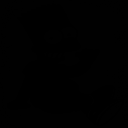

In [99]:
## being all 1 --> complete black
cv2_imshow(test_image.reshape(width, height))

In [100]:
## for a single sample image--> reshape(1,-1) and if single feature use --> (-1,1)
test_image = X_test[34]
test_image = scaler.inverse_transform(test_image.reshape(1, -1))

In [102]:
## now it is converted to original 0-255 format
test_image

array([[255., 255., 255., ..., 255., 255., 255.]])

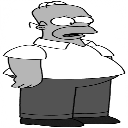

In [103]:
## now not that black box is showing
cv2_imshow(test_image.reshape(width, height))

# **Prediction** part

In [104]:
models_loaded.predict(test_image)[0][0]

1/1 [==============================] - 0s 78ms/step


0.0

In [105]:
if models_loaded.predict(test_image)[0][0] < 0.5:
  print('Bart')
else:
  print('Homer')

1/1 [==============================] - 0s 17ms/step
Bart


above wrong prediction --> homer predicted as Bart

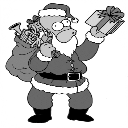

In [106]:
## another test --> 33rd image is santa
test_image = X_test[33]
test_image = scaler.inverse_transform(test_image.reshape(1, -1))
cv2_imshow(test_image.reshape(width, height))

In [107]:
## predicted wrongly again
if models_loaded.predict(test_image)[0][0] < 0.5:
  print('Bart')
else:
  print('Homer')


1/1 [==============================] - 0s 24ms/step
Bart
